<a href="https://colab.research.google.com/github/farhanarrafi/empirical-analysis-project/blob/main/Emperical_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cardiovascular Data Analysis using Statistical Methods

## Feature Description


age: Age of the patient in days.
.
gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
height: Height of the patient in centimeters.
weight: Weight of the patient in kilograms.
ap_hi: Systolic blood pressure.
ap_lo: Diastolic blood pressure.

* ID: Unique identifier for each patient.
* age_years: Age of the patient in years
* height: Height of the patient in centimeters.
* weight: Weight of the patient in kilograms.
* ap_hi: Systolic blood pressure.
* ap_lo: Diastolic blood pressure.
* bmi: Body Mass Index, derived from weight and height. Calculated as *BMI = weight / height^2*
* bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".



## Data Import

Dataset srouce: https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease


In [2]:
import os.path
import json


api_token = {"username":"farhanarrafi","key":"074ead27713d782ad86b0e445765e799"}

if not os.path.isdir('/root/.kaggle'):
  ! mkdir ~/.kaggle
  ! touch ~/.kaggle/kaggle.json
  with open('/root/.kaggle/kaggle.json', 'w') as file:
      json.dump(api_token, file)
  !chmod 600 ~/.kaggle/kaggle.json

#! kaggle datasets list

In [3]:
if not os.path.isfile('cardio_data_processed.csv'):
  ! kaggle datasets download -d colewelkins/cardiovascular-disease
  ! unzip cardiovascular-disease.zip
  ! rm -rf cardiovascular-disease.zip

 70% 1.00M/1.43M [00:00<00:00, 1.99MB/s]
100% 1.43M/1.43M [00:00<00:00, 2.64MB/s]
Archive:  cardiovascular-disease.zip
  inflating: cardio_data_processed.csv  


In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

cardioVascular_dataset = pd.read_csv('cardio_data_processed.csv')

# Remove columns
cardioVascular_dataset = cardioVascular_dataset.drop(axis='columns', columns=['age','gender', 'cholesterol','gluc','smoke','alco', 'active','cardio', 'bp_category_encoded'])
# Setting index
cardioVascular_dataset = cardioVascular_dataset.set_index('id')
# Remove bp categories other than Hypertension Stage 1 and 2
cardioVascular_dataset_filtered = cardioVascular_dataset.loc[(cardioVascular_dataset['bp_category'] == 'Hypertension Stage 1') |  (cardioVascular_dataset['bp_category'] == 'Hypertension Stage 2')]


11438

In [29]:
# Select first 2000
cardioVascular_dataset_filtered = cardioVascular_dataset_filtered.sample(5000, random_state=111)
# Check for null values
cardioVascular_dataset_filtered.isna().sum().sum()

0

997

In [5]:
len(cardioVascular_dataset_filtered)

5000

In [18]:
cardioVascular_dataset_filtered.mean()

<ipython-input-18-691787149147>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cardioVascular_dataset_filtered.mean()


height       164.575000
weight        75.295860
ap_hi        130.267800
ap_lo         84.179400
age_years     53.487000
bmi           27.940187
dtype: float64

29.220000000000002

<Axes: ylabel='Density'>

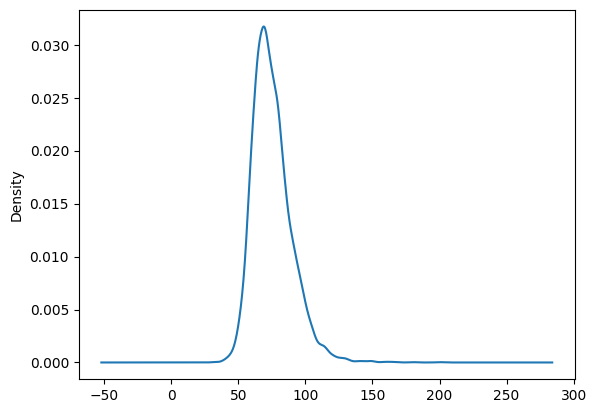

In [6]:
cardioVascular_dataset_filtered['weight'].plot.density()

In [7]:
samples = cardioVascular_dataset_filtered.sample(100, random_state=1199)
# Check for null values https://stackoverflow.com/a/69622929/3148856
samples.isna().sum().sum()

0

In [8]:
samples.max()

height                          189
weight                        129.0
ap_hi                           180
ap_lo                           120
age_years                        64
bmi                       41.007403
bp_category    Hypertension Stage 2
dtype: object

In [9]:
samples.min()

height                          148
weight                         50.0
ap_hi                           100
ap_lo                            70
age_years                        39
bmi                       16.514731
bp_category    Hypertension Stage 1
dtype: object

In [10]:
samples[samples['weight'] <= 50]

,height,weight,ap_hi,ap_lo,age_years,bmi,bp_category
id,,,,,,,
27835,174,50.0,120,80,41,16.514731,Hypertension Stage 1


<Axes: ylabel='Density'>

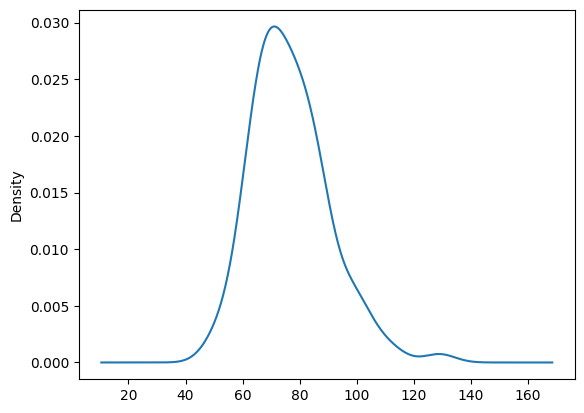

In [11]:
samples['weight'].plot.density()

<Axes: >

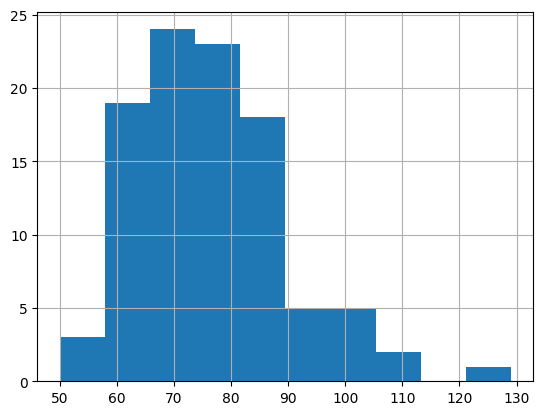

In [12]:
samples['weight'].hist()

In [13]:
# Grid code was provided by Chat GPT version 3 using the prompt - [how to print one column data contaning 20 items from a dataframe into a 4 by 5 grid]
# Reshape the 1D array into a 2D array with a shape of (4, 5)
grid_data = np.reshape(samples['weight'].to_numpy(), (10, 10))

# Loop through rows and print the data
for row in grid_data:
    print(','.join(map(str, row)))

65.0,78.0,75.0,72.0,85.0,70.0,100.0,70.0,98.0,86.0
97.0,129.0,108.0,79.0,63.0,80.0,75.0,63.0,75.0,52.0
63.0,70.0,87.0,87.0,88.0,59.0,80.0,89.0,72.0,65.0
83.0,80.0,62.0,80.0,64.0,62.0,80.0,75.0,84.0,68.0
78.0,66.0,71.0,91.0,59.0,80.0,50.0,53.0,76.0,68.0
73.0,58.0,86.0,100.0,87.0,71.0,80.0,66.0,68.0,62.0
69.0,80.0,69.0,65.0,65.0,67.0,62.0,76.0,88.0,92.0
86.0,82.0,97.0,102.0,89.0,65.0,71.0,76.0,69.0,58.0
65.0,70.0,113.0,69.0,73.0,78.0,72.0,95.0,85.0,104.0
82.0,65.0,87.0,70.0,84.0,80.0,74.0,74.0,79.0,71.0


In [14]:
samples.mean()

<ipython-input-14-8111d020ec13>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  samples.mean()


height       163.890000
weight        76.790000
ap_hi        130.100000
ap_lo         84.870000
age_years     53.520000
bmi           28.611298
dtype: float64

In [15]:
samples.std()

<ipython-input-15-70cfbb258cf1>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  samples.std()


height        8.247307
weight       13.584970
ap_hi        14.615959
ap_lo         7.950167
age_years     6.802376
bmi           4.642349
dtype: float64

In [37]:
len(samples[samples['weight'] > 70])

63

In [43]:
from scipy.stats.mstats import ttest_1samp
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
from statsmodels.stats.weightstats import ttest_ind

test_statistic = ttest_1samp(samples['weight'], popmean= 60, alternative='greater')

print(test_statistic)

Ttest_1sampResult(statistic=12.359246878796654, pvalue=4.401633132970351e-22)


In [47]:
from statsmodels.stats.proportion import proportions_ztest

zstat, pval = proportions_ztest(63, 100, value=0.5, prop_var=False, alternative='larger')

print('zstat: ',zstat)
print('pval: ',pval)

zstat:  2.6926023193385333
pval:  0.003544838884025079


In [71]:
from statsmodels.stats.proportion import proportion_confint

result = proportion_confint(63, 100, alpha=0.05, method='beta')
print(result)

(0.527648359448317, 0.7244334203854486)


In [79]:
ap_hi_samples = cardioVascular_dataset_filtered['ap_hi'].sample(100, random_state=1199)
# Check for null values https://stackoverflow.com/a/69622929/3148856
ap_hi_samples.isna().sum().sum()

0

In [83]:
ap_hi_grid_data = np.reshape(ap_hi_samples.to_numpy(), (10, 10))

# Loop through rows and print the data
for row in ap_hi_grid_data:
    print(','.join(map(str, row)))

150,140,120,120,130,130,140,120,120,130
120,140,140,120,120,130,130,130,130,140
120,120,140,120,145,130,120,130,120,120
130,140,140,170,120,140,130,130,160,140
110,120,120,150,120,140,120,120,110,140
160,110,140,140,120,130,120,120,100,140
120,120,170,120,140,150,140,115,110,140
160,120,120,130,120,150,120,120,120,110
120,120,120,120,120,140,120,120,140,120
120,120,120,130,140,180,120,150,160,140


In [85]:
ap_lo_samples = cardioVascular_dataset_filtered['ap_lo'].sample(100, random_state=1199)
# Check for null values https://stackoverflow.com/a/69622929/3148856
ap_lo_samples.isna().sum().sum()

0

In [86]:
ap_lo_grid_data = np.reshape(ap_lo_samples.to_numpy(), (10, 10))

# Loop through rows and print the data
for row in ap_lo_grid_data:
    print(','.join(map(str, row)))

100,90,80,80,90,80,80,80,80,70
80,90,90,80,80,80,90,82,90,80
80,80,120,80,90,80,80,90,80,80
90,90,90,110,80,80,90,90,100,90
80,80,80,80,80,90,80,80,80,90
90,90,90,100,80,80,80,80,80,80
80,80,100,80,90,100,90,80,80,80
90,80,80,90,80,90,80,80,80,80
80,80,100,80,90,80,85,80,100,80
80,80,80,70,80,90,80,90,100,80


<Axes: >

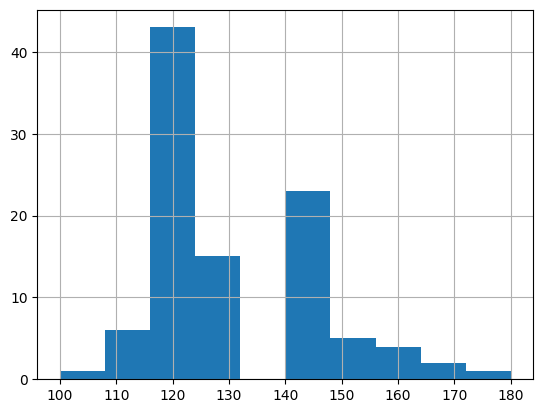

In [81]:
ap_hi_samples.hist()


<Axes: >

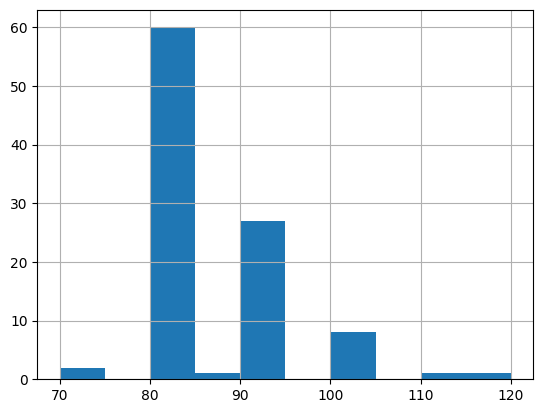

In [82]:
ap_lo_samples.hist()

# References


1.   https://stackoverflow.com/a/57401752

